In [1]:
import numpy as np

from signals.artinus_signals.modular_lines import extrema_lines, slope_filter, conacativity_filter, plot_single_value, get_price, get_price_rsi, line_point_filter, timeframe_multiplier, timeframe_divider

In [2]:
import influxdb_client, os, time
from influxdb_client import InfluxDBClient, Point, WritePrecision

org = "Artinus"
url = "https://eastus-1.azure.cloud2.influxdata.com"
token = "l7mZ63vVVzgUKP2z6_XMnZWKKJ4VNEeA6hSMPbqj_-z2l86OpSV8RA9EMzwoTPZSgg9KZzA8R6AkwztiBHgT6A=="
client = influxdb_client.InfluxDBClient(url=url, token=token, org=org)

# simple example

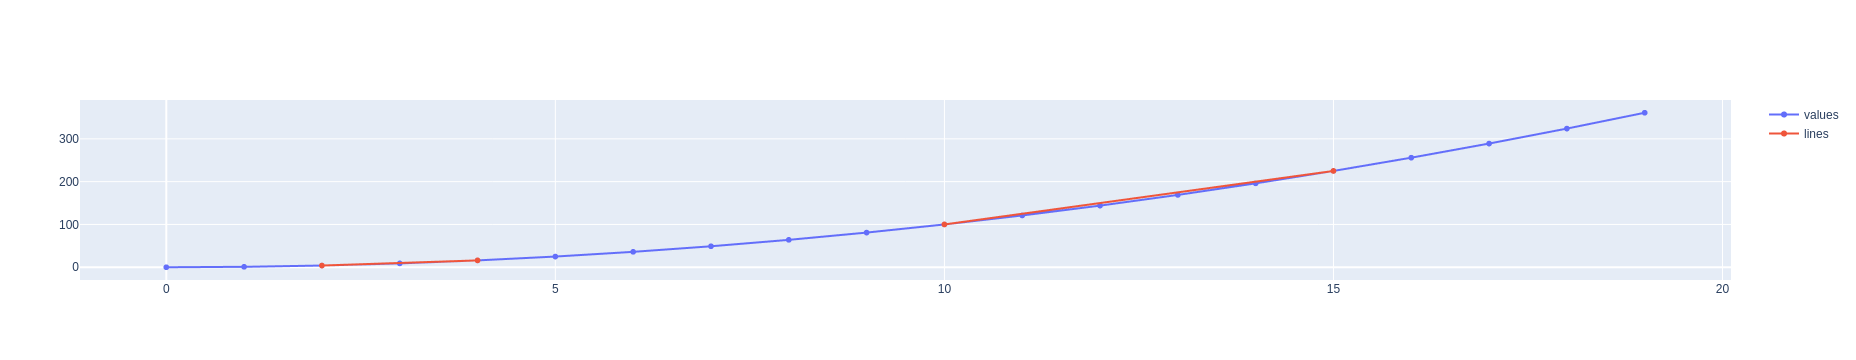

In [3]:

    
values = np.arange(20)**2
lines = [[2,4], [10,15]]

lines = slope_filter(values, lines, filter_type = 'higher')
plot_single_value(values, lines)



# Example on market data

### Getting the price and RSI

In [4]:



start = "2022-08-10T08:00:00+00:00",
end = "2022-08-12T10:00:00+00:00",
close_values, rsi_values = get_price_rsi(client, org, 'DukascopyTest', '2022-08-10T08:00:00+00:00', '2022-08-20T10:00:00+00:00', '1m', 'bid_close', window_length = 7)


/home/andrew/Documents/code/AlgoTrading/AlgoTrading/signals/artinus_signals/RSI.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/andrew/Documents/code/AlgoTrading/AlgoTrading/signals/artinus_signals/RSI.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### How the modular filters work

the slope_filter and conacativity_filter can be run in any order but slope_filter runs fastest so should be done first.

The first value of either slope_filter or conacativity_filter can be rsi_values OR close_values second MUST be lines.

The following code finds the point pairs(lines) that have a positive slope in price AND concave line of sight in RSI

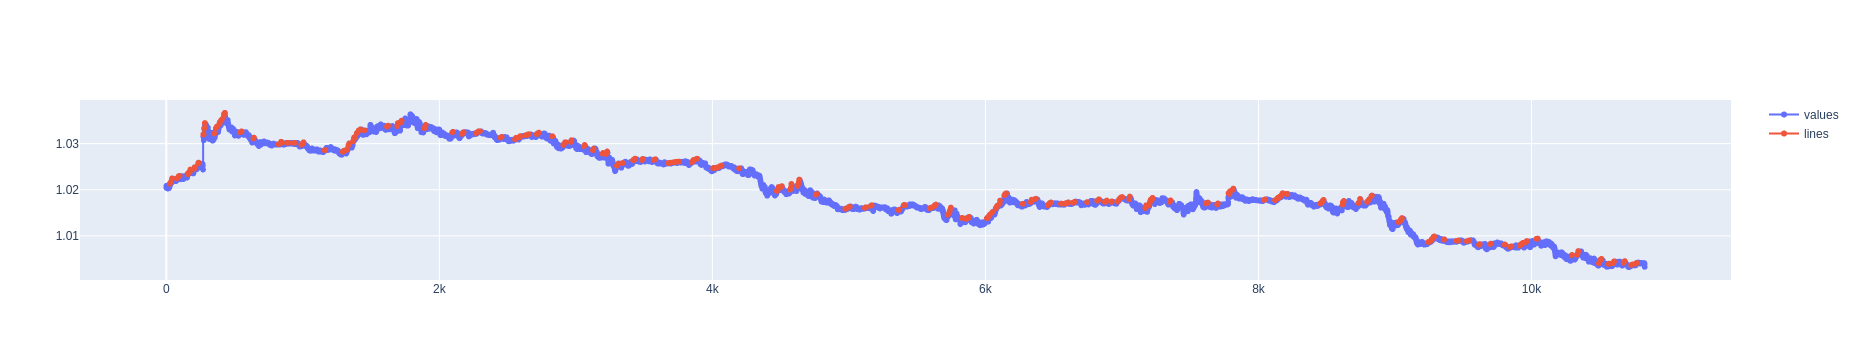

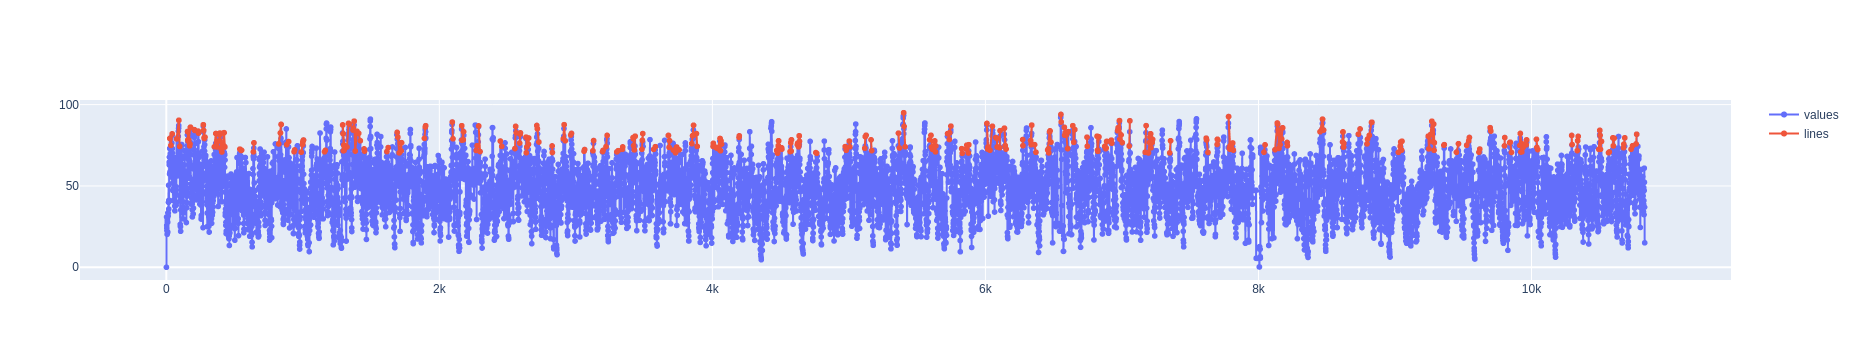

In [5]:
lines = extrema_lines(rsi_values, filter_type = 'high', num_periods=20, height = 30)
lines = slope_filter(close_values, lines, filter_type = 'higher')
lines = conacativity_filter(rsi_values, lines, filter_type = "concave")


plot_single_value(close_values, lines)
plot_single_value(rsi_values, lines)

In [6]:

lines = [(0,10),(0,20),(50,60)]
timeframe_divider(lines, 5)

array([[ 0,  2],
       [ 0,  4],
       [10, 12]])

# Reloaded

In [7]:
start = '2022-11-09T01:00:00+00:00'
end = '2022-12-18T01:00:00+00:00'

### Bull reverse divergence

In [8]:
# close_values_1m, rsi_values_1m = get_price_rsi(client, 'DukascopyTest', '2022-08-10T08:00:00+00:00', '2022-08-20T10:00:00+00:00', '1m', 'bid_close', window_length = 7)
close_values_5m, rsi_close_values_5m = get_price_rsi(client, org, 'DukascopyTest', start, end, '5m', 'bid_close', window_length = 7)
low_values_5m = get_price(client, org, 'DukascopyTest', start, end, '5m', 'bid_low')

close_values, rsi_values = get_price_rsi(client, org, 'DukascopyTest', '2022-08-10T08:00:00+00:00', '2022-08-20T10:00:00+00:00', '1m', 'bid_close', window_length = 7)




/home/andrew/Documents/code/AlgoTrading/AlgoTrading/signals/artinus_signals/RSI.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/andrew/Documents/code/AlgoTrading/AlgoTrading/signals/artinus_signals/RSI.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/andrew/Documents/code/AlgoTrading/AlgoTrading/signals/artinus_signals/RSI.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/andrew/Documents/code/AlgoTrading/

In [9]:
lines_5m_rsi = extrema_lines(rsi_close_values_5m, filter_type = 'low', num_periods=200, height = 30)
lines_5m_rsi = slope_filter(rsi_close_values_5m, lines_5m_rsi, filter_type = 'lower')
lines_5m_rsi = conacativity_filter(rsi_close_values_5m, lines_5m_rsi, filter_type = "convex")

In [10]:
lines_5m_low = extrema_lines(low_values_5m, filter_type = 'low', num_periods=200)
lines_5m_low = slope_filter(low_values_5m, lines_5m_low, filter_type = 'higher')

# plot_single_value(close_values_5m, lines_5m_rsi)
# plot_single_value(rsi_close_values_5m, lines_5m_rsi)





In [11]:
# lines_1m_rsi, lines_1m_low = line_point_filter(lines_5m_rsi, lines_5m_low, filter_type = 0, allowed_offset = 0)
# lines_1m_rsi, lines_1m_low = line_point_filter(lines_5m_rsi, lines_5m_low, filter_type = 1, allowed_offset = 0)

# plot_single_value(low_values_5m, lines_5m_low)
# plot_single_value(low_values_1m, lines_1m_rsi)


In [12]:
lines_5m_low, lines_5m_rsi = line_point_filter(lines_5m_low, lines_5m_rsi, filter_type = 0, allowed_offset = 1)


lines_5m_low, lines_5m_rsi = line_point_filter(lines_5m_low, lines_5m_rsi, filter_type = 1, allowed_offset = 1)

In [13]:
# plot_single_value(low_values_5m, lines_5m_rsi)
# plot_single_value(rsi_close_values_5m, lines_5m_rsi)

### Bull Regular Divergence

In [14]:
# close_values_1m, rsi_values_1m = get_price_rsi(client, 'DukascopyTest', '2022-08-10T08:00:00+00:00', '2022-08-20T10:00:00+00:00', '1m', 'bid_close', window_length = 7)
close_values_1m, rsi_close_values_1m = get_price_rsi(client, org, 'DukascopyTest', start, end, '1m', 'bid_close', window_length = 7)
low_values_1m = get_price(client, org, 'DukascopyTest', start, end, '1m', 'bid_low')


/home/andrew/Documents/code/AlgoTrading/AlgoTrading/signals/artinus_signals/RSI.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/andrew/Documents/code/AlgoTrading/AlgoTrading/signals/artinus_signals/RSI.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
lines_1m_rsi = extrema_lines(rsi_close_values_1m, filter_type = 'low', num_periods=28, height = 30)
lines_1m_rsi = slope_filter(rsi_close_values_1m, lines_1m_rsi, filter_type = 'higher')
lines_1m_rsi = conacativity_filter(rsi_close_values_1m, lines_1m_rsi, filter_type = "convex")



In [16]:
# plot_single_value(rsi_close_values_1m, lines_1m_rsi)

In [17]:
lines_1m_low = extrema_lines(low_values_1m, filter_type = 'low', num_periods=28)
lines_1m_low = slope_filter(low_values_1m, lines_1m_low, filter_type = 'lower')


In [18]:
lines_1m_rsi, lines_1m_low = line_point_filter(lines_1m_rsi, lines_1m_low, filter_type = 0, allowed_offset = 0)
lines_1m_rsi, lines_1m_low = line_point_filter(lines_1m_rsi, lines_1m_low, filter_type = 1, allowed_offset = 0)




# es_1m, lines_1m_rsi)


### Bull regualar and Bull Reverse comparison

Not doing it correctly because for case 3 events(Reloaded is case 3) the inferior(1m) timeframe needs to print BEFORE the superior(5m) timeframe. 

for case 4 events the inferior(1m) timeframe needs to print AFTER the superior timeframe

line_point_filter currently does not differentiate between before and after and needs to be modified to allow for this functionality

In [19]:
lines_5m_low = timeframe_multiplier(lines_5m_low, 5)

lines_1m_low, lines_5m_low = line_point_filter(lines_1m_low, lines_5m_low, filter_type = 1, allowed_offset = 15)

lines_5m_low = timeframe_divider(lines_5m_low, 5)

_, lines_5m_rsi = line_point_filter(lines_5m_low, lines_5m_rsi, filter_type = 0, allowed_offset = 1)
_, lines_1m_rsi = line_point_filter(lines_1m_low, lines_1m_rsi, filter_type = 1, allowed_offset = 0)

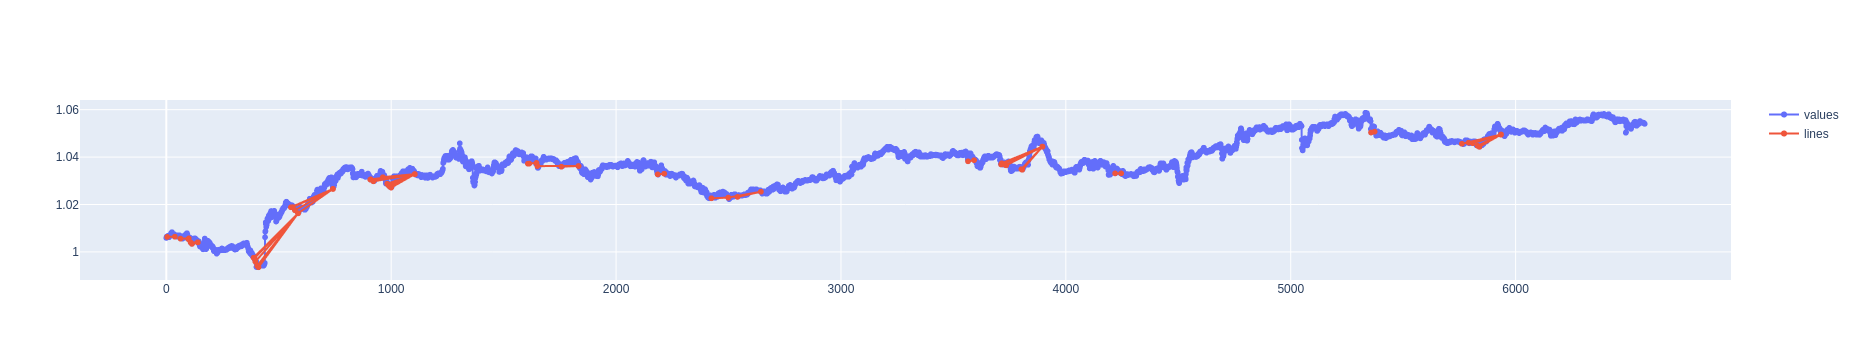

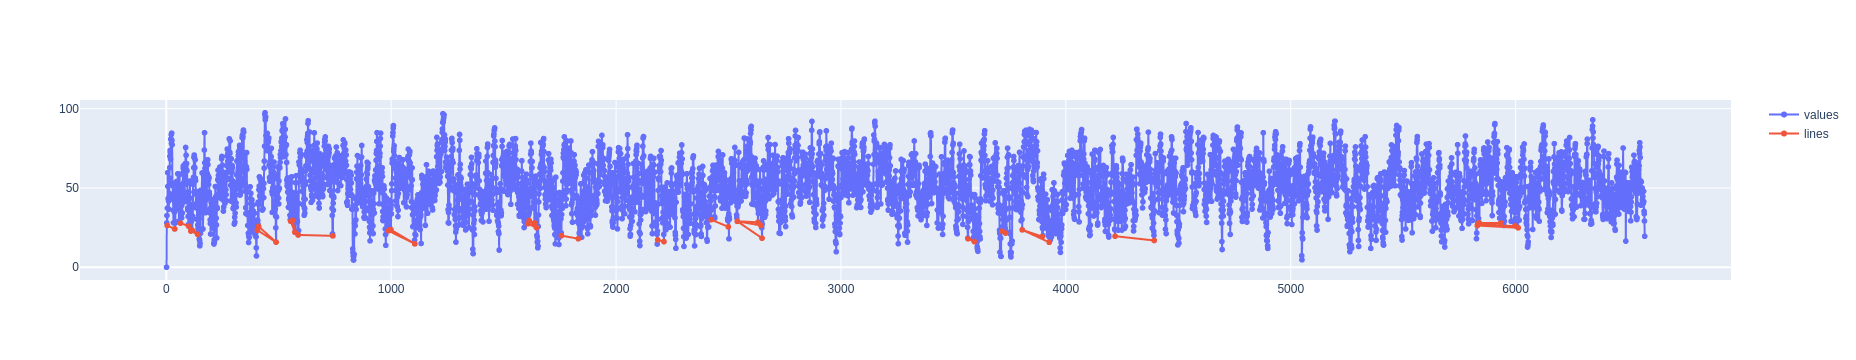

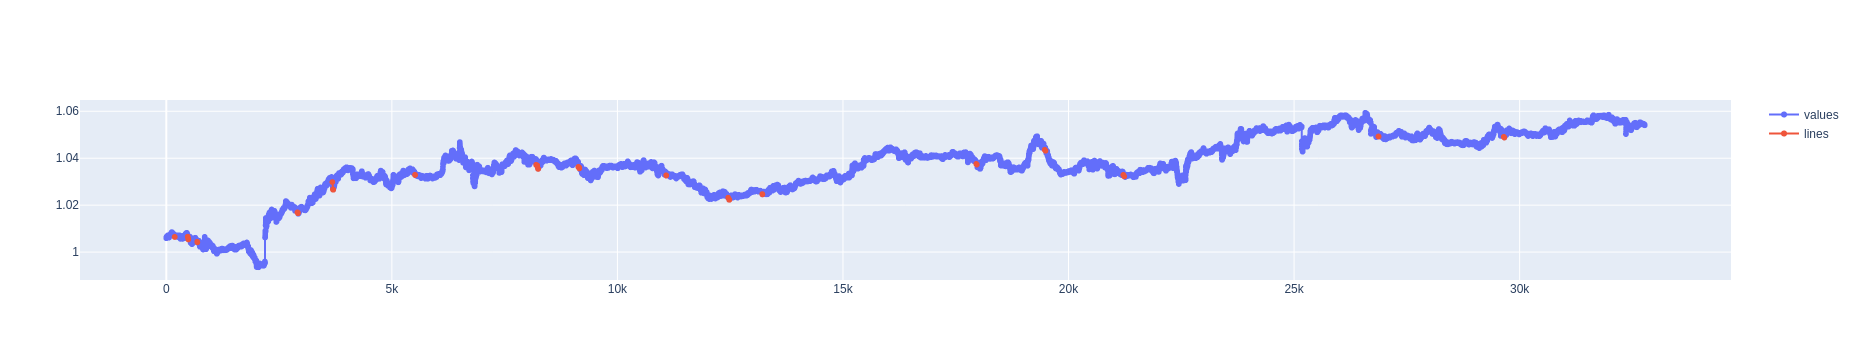

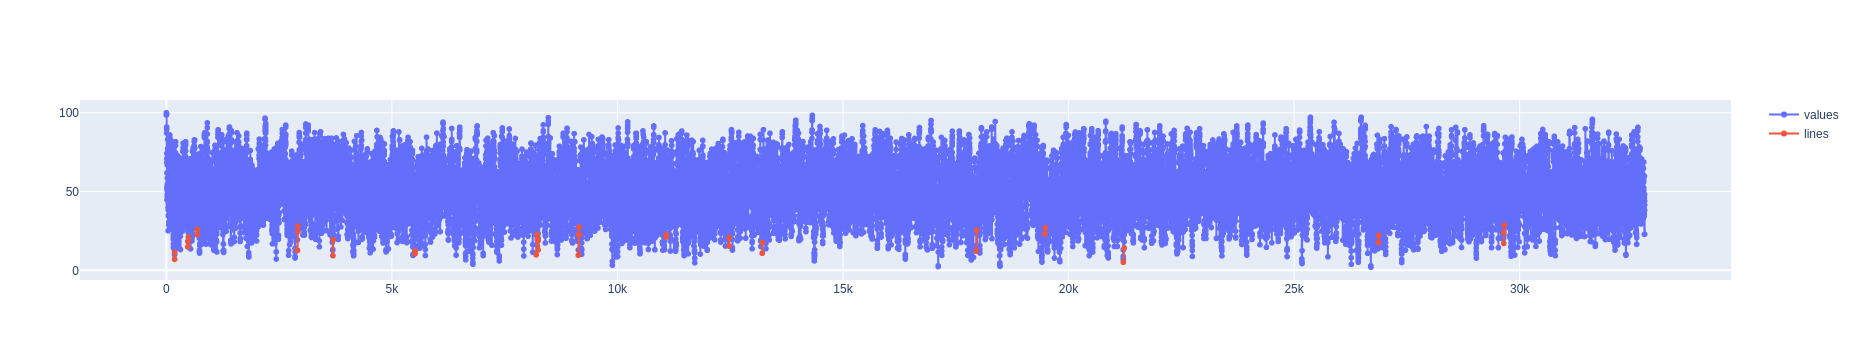

In [20]:
plot_single_value(low_values_5m, lines_5m_low)
plot_single_value(rsi_close_values_5m, lines_5m_rsi)

plot_single_value(low_values_1m, lines_1m_low)
plot_single_value(rsi_close_values_1m, lines_1m_rsi)

